# Hacktiv8 Phase 1: Graded Challenge 1

---

Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Regression.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

![Uber vs Lyft](https://photos5.appleinsider.com/gallery/37267-69909-1OLXiBSIR4zfrwXBI_emrgQ-xl.jpg)

### Dataset

Dataset yang digunakan pada project ini adalah dataset yang berisi tentang data perjalanan penumpang menggunakan **Uber** dan **Lyft** yang sudah termasuk informasi cuaca pada jam tersebut. Dataset ini berisi 693071 baris dengan 57 kolom yang di antaranya adalah id, timestamp, hour, day, month, datetime, timezone, source, destination, cab_type, product_id, name, price, distance, dan masih banyak lagi. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma).

### Objectives

**Graded Challenge 1** ini dibuat guna mengevaluasi konsep Regression sebagai berikut:

- Mampu memahami konsep regression dengan Linear Regession
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

## Import Libraries

Pada project kali ini library yang akan digunakan adalah **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, dan **Scikit-Learn**.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

Melakukan setting agar pandas menampilkan seluruh kolom pada dataframe.

In [2]:
pd.set_option('display.max_columns', None)

## Data Loading

membuat dataframe dari file `rideshare_kaggle.csv`.

In [3]:
rides = pd.read_csv('rideshare_kaggle.csv')

In [4]:
rides.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### Data Characteristics

In [5]:
rides.shape

(693071, 57)

Dataframe ini terbentuk dari:
- **693071** baris
- **57** kolom

In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari basic info ini dapat diketahui dataframe ini terdiri dari:
- 29 kolom dengan tipe float
- 17 kolom dengan tipe integer
- 11 kolom dengan tipe object

Dapat diketahui juga terdapat **missing value** pada kolom `price`.

In [7]:
rides.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


Distribusi dari kolom pada dataset kebanyakan memiliki distribusi yang cenderung normal (**Symmetrical Distribution**) contohnya pada kolom `hour`, `distance`, dan `temperature` dimana mean dari kolom tersebut berdekatan dengan mediannya.

## Data Cleansing

### Missing Value Check

Pada bagian ini akan dilakukan pengecekan apakah ada missing value pada setiap kolom dataframe.

In [8]:
rides.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [9]:
print(f'Percentage of missing values in price column: {(rides.price.isna().sum()/len(rides)*100):.2f}%')

Percentage of missing values in price column: 7.95%


Terdapat **55095** missing value pada kolom `price` dan persentase dari missing value pada kolom ini sebesar **7.95%**. 

In [10]:
rides[rides.price.isna()].head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.11,1.0,42.3647,-71.0542,36.99,32.27,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.68,5.87,6.26,1543672800,9.910,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-day,27.53,1022.32,344,0.44,1,9.910,280.1,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.48,1.0,42.3588,-71.0707,48.83,48.83,Overcast,Light rain until evening.,0.0,0.0,0.96,2.83,2.98,1543755600,7.790,50.73,1543788000,44.99,1543816800,50.06,1543788000,45.64,1543816800,cloudy,47.81,1002.81,275,1.00,0,7.790,287.3,1543751797,1543785238,0.86,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.94,1.0,42.3661,-71.0631,42.50,36.47,Partly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.54,10.68,17.15,1543514400,9.772,44.66,1543510800,28.68,1543575600,38.30,1543510800,27.26,1543568400,partly-cloudy-day,26.84,1008.44,314,0.35,0,9.772,307.4,1543492404,1543526094,0.75,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.16,1.0,42.3647,-71.0542,33.15,30.60,Mostly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.57,3.02,3.02,1544738400,9.956,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,partly-cloudy-day,19.51,1033.96,96,0.81,0,9.956,330.1,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.67,1.0,42.3647,-71.0542,31.80,31.80,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.83,2.10,4.79,1543554000,10.000,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,clear-day,27.14,1017.01,296,0.01,0,10.000,277.1,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600


In [11]:
rides[rides.price.isna()].name.value_counts()

Taxi    55095
Name: name, dtype: int64

In [12]:
rides[rides.price.isna()].cab_type.value_counts()

Uber    55095
Name: cab_type, dtype: int64

Pada dataset seluruh data yang memiliki **missing value** pada kolom `price` adalah data dari penumpang yang menggunakan **Taxi** dari **Uber**. Tetapi karena missing value ini berada pada kolom **target** (yang akan dijadikan prediksi), maka seluruh missing value nantinya akan dihapus dari dataset pada bagian **data preprocessing** karena nantinya akan mengganggu akurasi dari model.

### Duplicated Data

In [13]:
rides.duplicated().sum()

0

In [14]:
rides.duplicated().any()

False

Tidak terdapat duplicated rows pada dataset ini.

## Exploratory Data Analysis (EDA)

Karena jumlah kolom yang terdapat pada dataset ini sangat banyak, maka pada bagian exploratory daya analysis (**EDA**) akan dilakukan eksplorasi pada kolom-kolom tertentu saja yang saya rasa dapat digunakan sebagai feature.

### Price

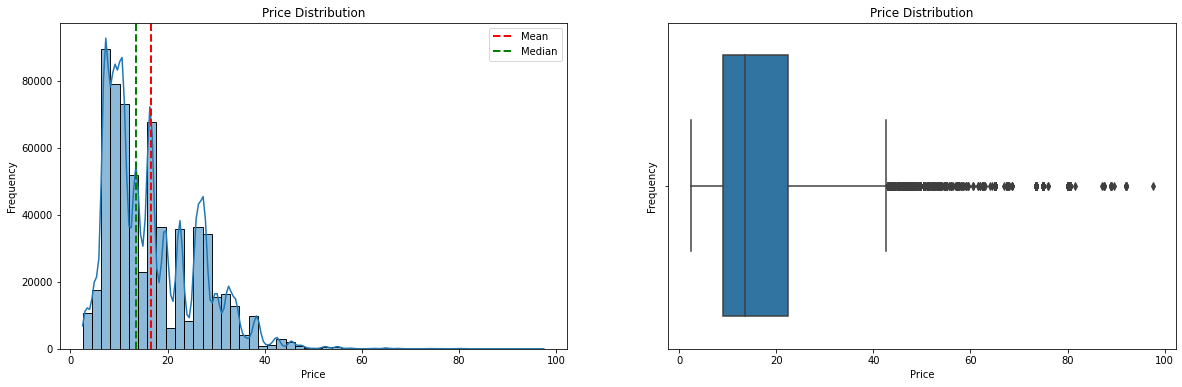

Skewness: 1.0457470560899256
Mean: 16.545125490614065
Median: 13.5


In [15]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.histplot(x='price', data=rides, bins=50, kde=True)
plt.axvline(rides.price.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(rides.price.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='price', data=rides)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {rides.price.skew()}')
print(f'Mean: {rides.price.mean()}')
print(f'Median: {rides.price.median()}')

Kolom `price` ini memiliki distribusi yang **Highly Skewed** karena nilai skewnessnya lebih dari 1 dengan bentuknya distribusi yang **Right-Skewed**. Dari boxplot ini juga dapat dilihat bahwa kolom ini **memiliki beberapa outlier**.

### Time (Hour, Day, Month)

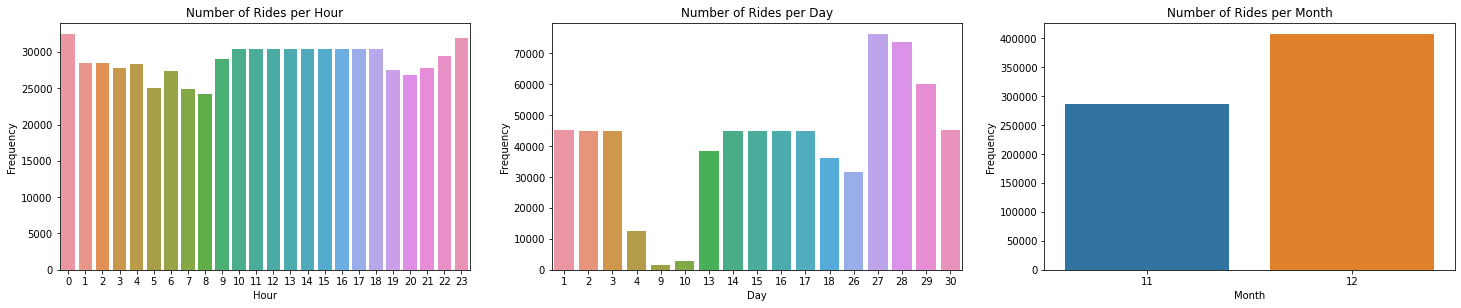

In [16]:
plt.figure(figsize=(25,10))
plt.subplot(2, 3, 1)
sns.countplot(x='hour', data=rides)
plt.title('Number of Rides per Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.subplot(2, 3, 2)
sns.countplot(x='day', data=rides)
plt.title('Number of Rides per Day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.subplot(2, 3, 3)
sns.countplot(x='month', data=rides)
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

Dapat dilihat jumlah perjalanan mulai **menurun pada jam 1 sampai jam 8** hal ini mungkin disebabkan karena banyak orang yang belum memulai aktifitas pada jam-jam tersebut lalu jumlah perjalanan **kembali naik pada jam 9** saat orang sudah banyak memulai aktifitas. Jumlah perjalanan juga sangat **sedikit pada tanggal 9 dan 10** dengan jumlah perjalan **terbanyak ada pada tanggal 27 dan 28**. Jumlah perjalanan terbanyak berada pada bulan Desember.

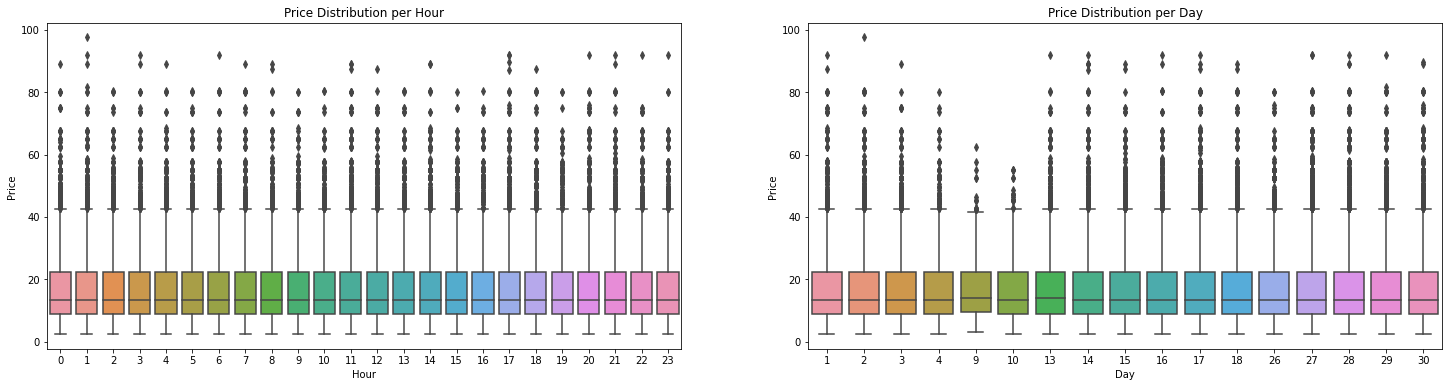

In [17]:
plt.figure(figsize=(25,6))
plt.subplot(1, 2, 1)
sns.boxplot(x='hour', y='price', data=rides)
plt.title('Price Distribution per Hour')
plt.xlabel('Hour')
plt.ylabel('Price')
plt.subplot(1, 2, 2)
sns.boxplot(x='day', y='price', data=rides)
plt.title('Price Distribution per Day')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

Dari boxplot ini dapat diketahui bahwa **tidak ada hubungan linear** antara kolom `price` dengan kolom `hour` dan `day`, maka nantinya kolom-kolom tersebut tidak akan digunakan sebagai feature.

### Product ID

In [18]:
rides.product_id.value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft                                    51235
lyft_premier                            51235
lyft_plus                               51235
lyft_luxsuv                             51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

Pada kolom `product_id` ada sekitar **6 product id** yang hanya berbentuk unique value dan tidak memiliki nama, seperti **9a0e7b09-b92b-4c41-9779-2ad22b4d779d** atau **6d318bcc-22a3-4af6-bddd-b409bfce1546**.

In [19]:
rides.groupby(['product_id', 'name']).size()

product_id                            name        
55c66225-fbe7-4fd5-9072-eab1ece5e23e  UberX           55094
6c84fd89-3f11-4782-9b50-97c468b19529  Black           55095
6d318bcc-22a3-4af6-bddd-b409bfce1546  Black SUV       55096
6f72dfc5-27f1-42e8-84db-ccc7a75f6969  UberXL          55096
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi            55095
997acbb5-e102-41e1-b155-9df7de0a73f2  UberPool        55091
9a0e7b09-b92b-4c41-9779-2ad22b4d779d  WAV             55096
lyft                                  Lyft            51235
lyft_line                             Shared          51233
lyft_lux                              Lux Black       51235
lyft_luxsuv                           Lux Black XL    51235
lyft_plus                             Lyft XL         51235
lyft_premier                          Lux             51235
dtype: int64

Kolom `product_id` ini ternyata dapat direpresentasi oleh kolom `name` (nama produk), maka kolom `product_id` ini nantinya tidak akan gunakanan sebagai feature.

### Cab Type & Name

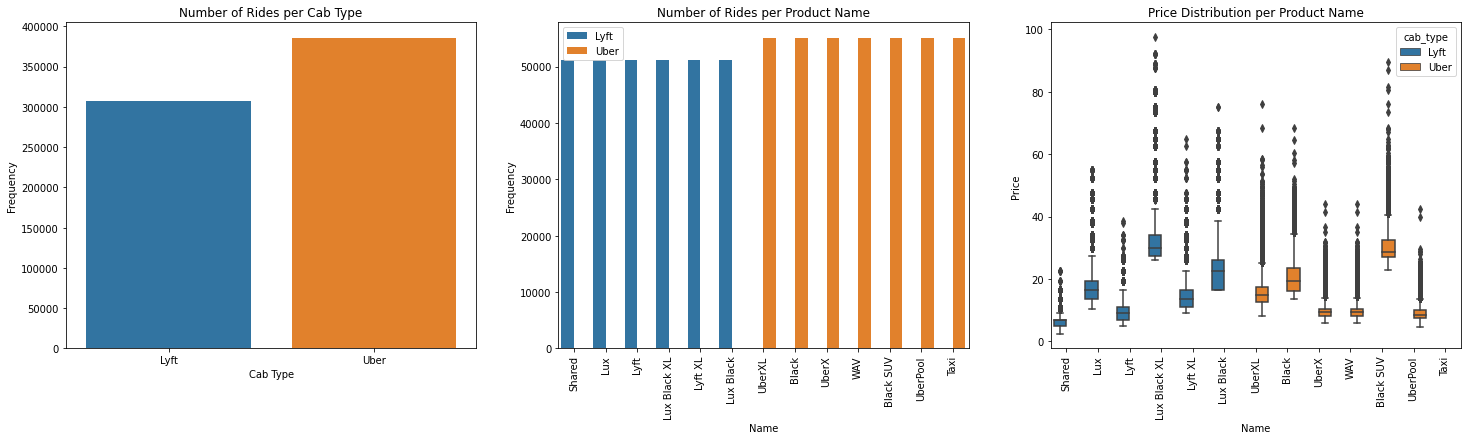

In [20]:
plt.figure(figsize=(25,6))
plt.subplot(1, 3, 1)
sns.countplot(x='cab_type', data=rides)
plt.title('Number of Rides per Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
sns.countplot(x='name', data=rides, hue='cab_type')
plt.title('Number of Rides per Product Name')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
sns.boxplot(x='name', y='price', data=rides, hue='cab_type')
plt.title('Price Distribution per Product Name')
plt.xlabel('Name')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

Dari plot diatas dapat dilihat bahwa produk-produk **Uber** lebih banyak melakukan perjalanan ketimbang produk-produk **Lyft**. Nama produk yang digunakanan penumpang ini juga mempengaruhi tarif dari perjalanan seperti **Lux Black XL** merupakan produk paling mahal dari **Lyft** dan **Black SUV** merupakan produk paling mahal dari **Uber**.

Dari box plot ini juga menunjukan bahwa produk yang dipilih penumpang akan mempengaruhi `price`.

### Distance

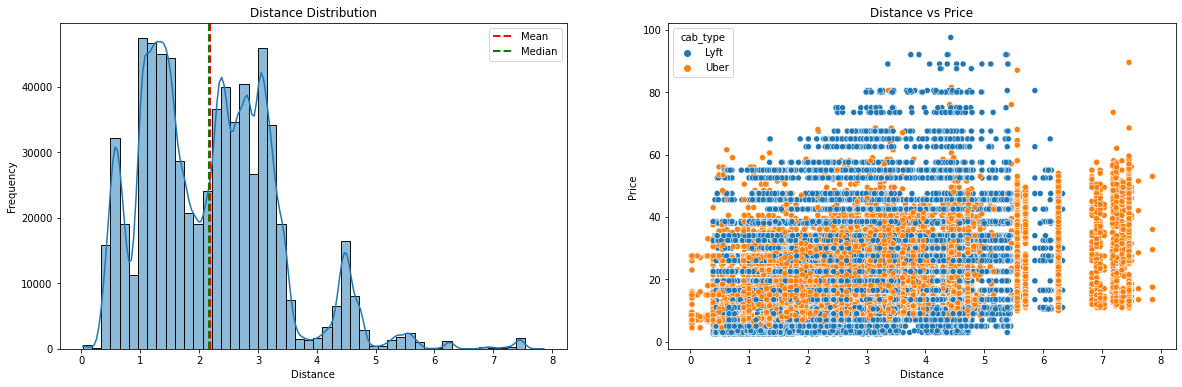

Skewness: 0.8343950077972692
Mean: 2.1894297553930255
Median: 2.16


In [21]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.histplot(x='distance', data=rides, bins=50, kde=True)
plt.axvline(rides.distance.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(rides.distance.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.scatterplot(x='distance', y='price', data=rides, hue='cab_type')
plt.title('Distance vs Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()
print(f'Skewness: {rides.distance.skew()}')
print(f'Mean: {rides.distance.mean()}')
print(f'Median: {rides.distance.median()}')

Distribusi dari kolom `distance` ini jika dilihat dari nilai skewness dan bentuk dari histogramnya tergolong distribusi **Right-Skewed** walaupun mean dan mediannya berdekatan hal ini mungkin terjadi karena terdapat outlier pada kolom ini. Dari scatter plot juga dapat dilihat bahwa kolom `distance` dan kolom `price` ini memiliki **Positive Correlation** dimana semakin jauh `distance` maka `price` akan semakin besar. 

Dari scatter plot juga dapat diketahui bahwa tarif yang ditawarkan oleh **Uber** ini lebih murah dibandingkan **Lyft**.

### Surge Multiplier

In [22]:
rides.groupby(['cab_type', 'surge_multiplier']).size()

cab_type  surge_multiplier
Lyft      1.00                286433
          1.25                 11085
          1.50                  5065
          1.75                  2420
          2.00                  2239
          2.50                   154
          3.00                    12
Uber      1.00                385663
dtype: int64

Surge multiplier akan meningkat saat banyak permintaan perjalanan yang menyebabkan meningkatnya tarif, pada dataset **Lyft** memasang surge multiplier yang bervariasi mulai dari 1x hingga 3x sedangkan **Uber** tidak ada surge multiplier.

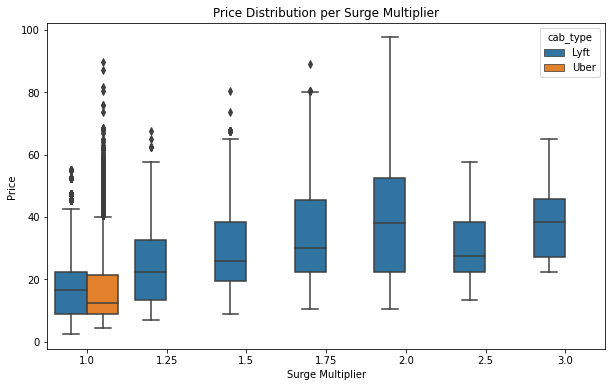

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='surge_multiplier', y='price', data=rides, hue='cab_type')
plt.title('Price Distribution per Surge Multiplier')
plt.xlabel('Surge Multiplier')
plt.ylabel('Price')
plt.show()

Dari boxplot ini dapat dilihat bahwa dengan menikatnya `surge_multiplier` maka `price` pun ikut menigkat, ini menunjukan adanya hubungan antara kolom-kolom tersebut.

### Temperature

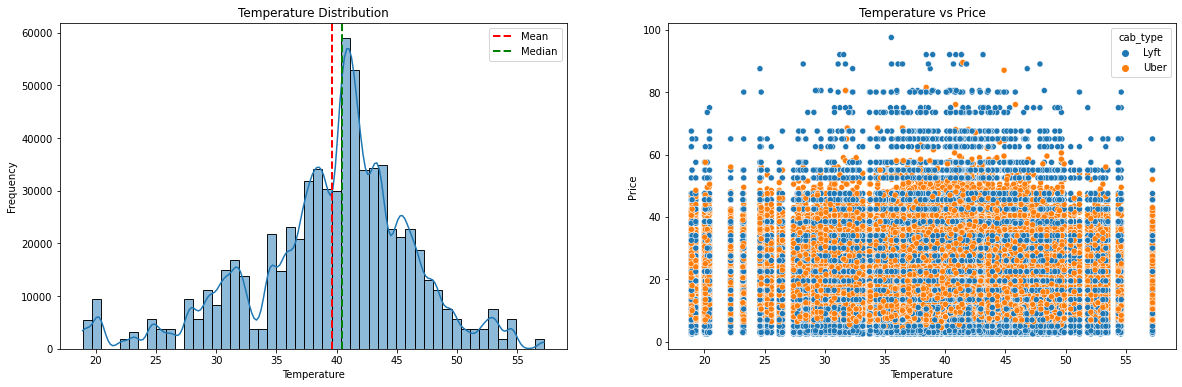

Skewness: -0.6090401295944383
Mean: 39.584388468136744
Median: 40.49


In [24]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='temperature', data=rides, bins=50, kde=True)
plt.axvline(rides.temperature.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(rides.temperature.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.scatterplot(x='temperature', y='price', data=rides, hue='cab_type')
plt.title('Temperature vs Price')
plt.xlabel('Temperature')
plt.ylabel('Price')
plt.show()
print(f'Skewness: {rides.temperature.skew()}')
print(f'Mean: {rides.temperature.mean()}')
print(f'Median: {rides.temperature.median()}')

Distribusi dari `temperature` ini cenderung memiliki distribusi yang **Normal** walaupun jika dilihat dari nilai skewnessnya sedikit Left-Skewed dengan rata-ratanya sekitar 39.58°F ini mungkin karena dataset yang digunakan hanya mendata perjalanan pada bulan november hingga desember di USA yang mana disana sedang musim dingin.

Namun, dari scatter plot tidak menunjukan bahwa adanya hubungan antara `temperature` dengan `price`.

### Short Summary (Weather)

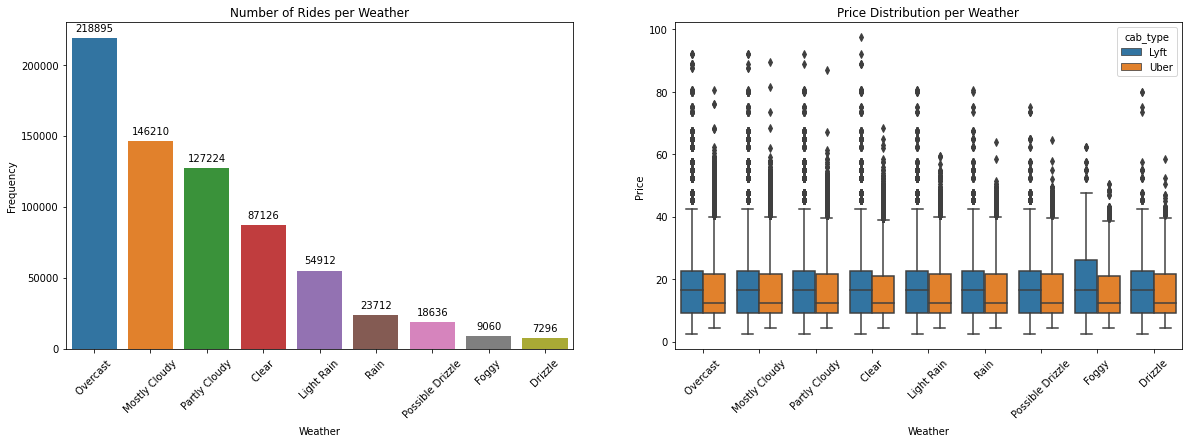

In [25]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
weather = sns.countplot(x='short_summary', data=rides, order=rides.short_summary.value_counts().index)
for p in weather.patches:
    weather.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Number of Rides per Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.boxplot(x='short_summary', y='price', data=rides, hue='cab_type', order=rides.short_summary.value_counts().index)
plt.title('Price Distribution per Weather')
plt.xlabel('Weather')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Karena di USA sedang musim dingin, maka pada kolom `short_summary` atau cuaca ini banyak mentatat saat cuaca **mendung**. Namun, sepertinya cuaca juga tidak mempengaruhi `price` dari sebuah perjalanan jika dilihat dari box plot.

### Correlation Between Numeric Columns

In [26]:
corr = rides.corr()
corr.style.background_gradient(cmap='coolwarm')

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028004,-0.341292,0.771182,0.000808,0.003553,0.000572,0.168130,-0.136802,-0.248748,-0.226264,-0.179958,-0.147596,-0.168024,-0.066171,0.005706,0.998842,0.158993,-0.228125,0.999332,-0.366859,0.999175,-0.215363,0.999313,-0.401999,0.999203,-0.265444,0.533025,-0.133526,-0.081699,-0.025708,0.158993,0.196518,0.999372,0.999372,-0.846203,-0.211700,0.999364,-0.306971,0.998194,-0.186328,0.999290,-0.378346,0.998286,-0.157748,0.999276
hour,-0.028004,1.000000,0.066090,-0.079379,0.000561,0.002280,-0.000077,0.019493,-0.006295,0.218769,0.198190,-0.233349,-0.129725,-0.275762,0.072778,0.077308,-0.028047,0.174129,0.005172,-0.027838,0.015326,-0.026797,0.005513,-0.027997,0.016005,-0.026970,0.004839,-0.067366,0.036089,0.026525,0.330209,0.174129,0.034164,-0.027537,-0.027535,0.020483,0.019940,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785
day,-0.341292,0.066090,1.000000,-0.861306,-0.000722,-0.000627,0.001389,0.006838,0.078690,-0.084116,-0.223545,0.091664,0.030903,-0.093340,0.440502,0.402637,-0.336417,0.104992,-0.283561,-0.343118,-0.088320,-0.333558,-0.398183,-0.343291,-0.192984,-0.335504,-0.101582,-0.444635,0.092167,-0.041190,-0.011885,0.104992,0.377057,-0.341068,-0.341012,-0.007260,0.145568,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411
month,0.771182,-0.079379,-0.861306,1.000000,0.000913,0.002298,-0.000628,0.085791,-0.126912,-0.081774,0.024983,-0.154531,-0.098031,-0.022256,-0.334803,-0.270494,0.767265,0.011493,0.068313,0.772053,-0.138732,0.765489,0.152651,0.772163,-0.086998,0.766822,-0.074794,0.589609,-0.135103,-0.016800,-0.012321,0.011493,-0.149333,0.770684,0.770646,-0.452469,-0.213054,0.770767,-0.191803,0.765255,0.105326,0.772989,-0.191153,0.766031,0.215076,0.772896
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003553,0.002280,-0.000627,0.002298,0.345061,1.000000,0.024769,0.000819,-0.000293,-0.002884,-0.003116,-0.000256,0.000371,-0.003901,0.002277,0.001364,0.003618,0.004092,-0.004154,0.003604,-0.002146,0.003556,-0.004098,0.003585,-0.001501,0.003583,-0.004078,0.003490,-0.002146,-0.000905,0.002318,0.004092,0.001467,0.003556,0.003556,-0.004594,0.000648,0.003562,-0.003396,0.003428,-0.004191,0.003580,-0.003937,0.003526,-0.004238,0.003584
surge_multiplier,0.000572,-0.000077,0.001389,-0.000628,0.240458,0.024769,1.000000,0.001375,-0.001829,-0.001572,-0.002532,-0.001530,-0.002769,-0.001676,0.002511,0.002093,0.000439,0.001714,-0.001897,0.000520,-0.002601,0.000573,-0.002041,0.000520,-0.002994,0.000551,-0.001849,-0.003003,0.002167,-0.002103,-0.002422,0.001714,0.003324,0.000544,0.000544,-0.000150,-0.000101,0.000544,-0.000724,0.000554,-0.001951,0.000522,-0.001304,0.000464,-0.002154,0.000519
latitude,0.168130,0.019493,0.006838,0.085791,0.002088,0.000819,0.001375,1.000000,-0.531259,-0.098604,-0.067098,-0.074181,-0.071275,-0.117481,-0.097139,0.024309,0.172625,0.124166,-0.115307,0.173702,-0.032133,0.171193,-0.092167,0

Dari **correlation matrix** kolom-kolom numerik diatas, secara statistik kolom `price` hanya memiliki hubungan dengan kolom `distance` dan kolom `surge_multiplier` karena nilai correlation dengan kolom lain mendekati 0. Maka, kolom numerik yang akan dijadikan feature hanya kolom `distance` dan `surge_multiplier`.

### Correlation Between Categorical Columns

In [27]:
cat_corr = pd.get_dummies(rides[['price', 'source', 'destination', 'cab_type', 'name', 'short_summary']]).corr()
cat_corr.style.background_gradient(cmap='coolwarm')

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
price,1.000000,-0.016101,-0.028396,0.074634,0.059317,0.053468,-0.095924,-0.045006,-0.005821,0.043847,-0.028216,0.001678,-0.014092,-0.010834,-0.009565,0.077515,0.051780,0.049051,-0.074040,-0.049891,0.008360,0.041467,-0.055504,-0.018458,-0.010306,0.083385,-0.083385,0.131185,0.453096,0.038857,0.206544,0.500057,-0.219756,-0.039163,-0.333235,nan,-0.256930,-0.223551,-0.028587,-0.223557,-0.002387,-0.000480,-0.000052,0.000508,0.002734,-0.000729,0.000350,-0.001137,-0.000104
source_Back Bay,-0.016101,1.000000,-0.090637,-0.090947,-0.090941,-0.091882,-0.090923,-0.090946,-0.090391,-0.090940,-0.090935,-0.090989,-0.090773,-0.090961,-0.090637,0.087202,0.087860,-0.091877,0.090412,0.102137,-0.090392,0.090036,0.087972,-0.090976,-0.090785,0.000228,-0.000228,-0.000060,-0.000062,0.000075,0.000075,0.000075,0.000075,0.000075,0.000058,-0.000060,-0.000054,-0.000059,-0.000062,-0.000062,-0.000898,0.001106,0.000989,0.000447,-0.001110,0.002429,-0.002098,-0.000257,0.000711
source_Beacon Hill,-0.028396,-0.090637,1.000000,-0.090613,-0.090607,-0.091545,-0.090589,-0.090612,-0.090059,-0.090606,-0.090601,-0.090655,-0.090440,-0.090626,-0.090303,0.084050,0.088119,-0.091540,0.090565,0.099543,-0.090060,0.092821,0.088516,-0.090642,-0.090451,0.000034,-0.000034,-0.000004,-0.000005,0.000010,0.000010,0.000010,0.000010,0.000010,0.000013,-0.000023,-0.000017,-0.000002,-0.000005,-0.000005,-0.000823,-0.001297,0.004775,0.001453,0.001184,-0.002092,0.000484,-0.001602,0.000175
source_Boston University,0.074634,-0.090947,-0.090613,1.000000,-0.090917,-0.091858,-0.090899,-0.090922,-0.090367,-0.090916,-0.090911,-0.090965,-0.090749,0.087229,0.083917,-0.090923,-0.090917,0.090002,-0.090923,-0.090916,0.089587,-0.090915,-0.090910,0.097233,0.097547,-0.000010,0.000010,0.000002,0.000000,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000000,0.000002,0.000009,0.000004,0.000000,0.000000,-0.000213,0.000047,-0.003590,-0.001327,0.002087,-0.001570,0.000749,-0.003783,0.005678
source_Fenway,0.059317,-0.090941,-0.090607,-0.090917,1.000000,-0.091852,-0.090893,-0.090916,-0.090361,-0.090910,-0.090905,-0.090959,-0.090743,0.088019,0.088119,-0.090917,-0.090911,0.089456,-0.090917,-0.090910,0.094747,-0.090909,-0.090904,0.083673,0.101517,0.000023,-0.000023,-0.000006,-0.000008,0.000007,0.000007,0.000007,0.000007,0.000007,0.000010,-0.000006,-0.000000,-0.000005,-0.000008,-0.000008,0.000573,0.000716,-0.000460,-0.004389,-0.001323,0.000487,0.003436,-0.001034,0.000688
source_Financial District,0.053468,-0.091882,-0.091545,-0.091858,-0.091852,1.000000,-0.091834,-0.091857,-0.091297,-0.091851,-0.091846,-0.091901,-0.091683,-0.091872,-0.091545,0.089988,0.089704,-0.092798,0.097890,0.083040,-0.091298,0.088436,0.102027,-0.091888,-0.091694,0.001368,-0.001368,-0.000359,-0.000361,0.000436,0.000436,0.000436,0.000436,0.000436,0.000419,-0.000359,-0.000353,-0.000358,-0.000361,-0.000361,-0.000327,-0.001805,-0.000474,0.005668,0.001682,-0.001314,-0.002047,-0.000371,-0.002240
source_Haymarket Square,-0.095924,-0.090923,-0.090589,-0.090899,-0.090893,-0.091834,1.00

Kolom `price` secara statistik hanya memiliki hubungan dengan kolom `name` tetapi tidak dengan kolom `cab_type` yang pada awalnya saya mengasumsikan bahwa `cab_type` akan berpengaruh pada `price`.

Maka kolom categorical yang akan digunakan sebagai feature hanya kolom `name` saja, karena dari hasil **correlation matrix** diatas nilai correlation kolom `price` dengan kolom lain selain `name` mendekati 0.

## Data Preprocessing

### Data Inference

Pada bagian data inference ini akan mengambil sample sebanyak **10 data** dari dataframe utama.

In [28]:
# Get Data Inference
inference = rides.sample(10, random_state=23)

# Remove Data Inference from main dataframe
rides = rides.drop(inference.index)

inference

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
305558,5ccbd41a-2d48-4f11-8bf9-a3d231308530,1.543882e+09,0,4,12,2018-12-04 00:13:02,America/New_York,Northeastern University,Financial District,Lyft,lyft_line,Shared,9.0,4.09,1.0,42.3429,-71.1003,46.36,44.64,Clear,Foggy in the morning.,0.0,0.0,0.57,4.03,6.32,1543856400,10.000,57.42,1543852800,33.60,1543921200,56.75,1543852800,28.23,1543914000,clear-night,31.82,1002.03,266,0.01,0,10.000,326.9,1543838263,1543871634,0.89,0.0004,1543852800,42.86,1543896000,57.42,1543852800,39.73,1543896000,56.75,1543852800
19142,dac522c6-470c-4611-a562-d3e712fb10f8,1.543436e+09,20,28,11,2018-11-28 20:17:09,America/New_York,Theatre District,Haymarket Square,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,14.0,1.61,1.0,42.3644,-71.0661,41.91,36.71,Overcast,Mostly cloudy throughout the day.,0.0,0.0,0.60,8.42,13.00,1543431600,10.000,42.57,1543438800,37.37,1543489200,36.55,1543438800,31.91,1543478400,cloudy,29.05,992.85,295,1.00,0,10.000,355.0,1543405938,1543439719,0.72,0.0000,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800
274878,73b260d3-0499-4208-9e56-09d6854c8ebb,1.544947e+09,7,16,12,2018-12-16 07:50:05,America/New_York,Beacon Hill,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,10.0,1.75,1.0,42.3519,-71.0643,40.19,35.10,Partly Cloudy,Rain throughout the day.,0.0,0.0,0.69,7.48,9.70,1545015600,10.000,43.70,1544990400,34.07,1545044400,38.29,1544986800,28.11,1545044400,partly-cloudy-night,30.69,1023.03,54,0.20,0,10.000,299.3,1544962119,1544994844,0.30,0.1261,1544979600,39.07,1544954400,43.70,1544990400,33.64,1545019200,38.29,1544986800
466719,7e6e4773-d6e0-46d4-9f6f-bcb814567b74,1.544761e+09,4,14,12,2018-12-14 04:20:13,America/New_York,Theatre District,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,1.57,1.0,42.3559,-71.0550,31.10,31.10,Overcast,Partly cloudy throughout the day.,0.0,0.0,0.71,1.66,2.42,1544738400,9.849,33.96,1544731200,27.21,1544781600,32.95,1544734800,24.55,1544785200,cloudy,22.68,1034.90,200,1.00,0,9.849,310.1,1544702790,1544735601,0.21,0.0001,1544716800,18.24,1544688000,33.96,1544731200,13.72,1544688000,32.95,1544734800
343383,00d69a4b-77b7-434a-b209-1d176e72831e,1.543885e+09,0,4,12,2018-12-04 00:53:03,America/New_York,Boston University,West End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,7.5,3.04,1.0,42.3429,-71.1003,46.36,44.64,Clear,Foggy in the morning.,0.0,0.0,0.57,4.03,6.32,1543856400,10.000,57.42,1543852800,33.60,1543921200,56.75,1543852800,28.23,1543914000,clear-night,31.82,1002.03,266,0.01,0,10.000,326.9,1543838263,1543871634,0.89,0.0004,1543852800,42.86,1543896000,57.42,1543852800,39.73,1543896000,56.75,1543852800
19296,ad0cc1ac-9d50-4ace-aa3f-82950340dee9,1.544990e+09,19,16,12,2018-12-16 19:55:11,America/New_York,North Station,Northeastern University,Lyft,lyft_luxsuv,Lux Black XL,34.0,3.32,1.0,42.3644,-71.0661,43.06,38.26,Overcast,Rain throughout the day.,0.0,0.0,0.71,8.12,13.44,1545015600,10.000,43.74,1544990400,34.07,1545044400,38.36,1544986800,28.17,1545044400,cloudy,34.25,1015.00,71,1.00,0,10.000,322.7,1544962122,1544994842,0.30,0.1246,1544979600,38.88,1544954400,43.74,1544990400,33.68,1545019200,38.36,1544986800
10622,a640ba0c-d725-4a65-bf52-bc7afb81d173,1.543583e+09,13,30,11,2018-11-30 13:02:58,Ameri

Data diatas adalah **data inference** yang nantinya di uji pada model yang sudah dilatih dan divalidasi.

### Split Data

Membuat training set dan test set dengan perbandingan **8:2**, dimana:
- **80%** data menjadi **training set**
- **20%** data menjadi **test set**

In [29]:
df_train, df_test = train_test_split(rides, test_size=0.2, random_state=23)

Isi dari training dataframe.

In [30]:
df_train

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
240148,9b332c99-d29f-4545-838f-3e08a8ebbb5a,1.543272e+09,22,26,11,2018-11-26 22:41:42,America/New_York,Financial District,Haymarket Square,Lyft,lyft,Lyft,7.0,1.02,1.00,42.3503,-71.0810,44.93,41.07,Possible Drizzle,"Rain until morning, starting again in the eve...",0.0031,0.42,0.88,7.02,7.02,1543287600,9.967,46.46,1543255200,42.17,1543298400,43.81,1543251600,37.08,1543298400,rain,41.58,1009.43,106,1.00,0,9.967,295.9,1543233004,1543266980,0.64,0.1245,1543251600,40.67,1543233600,46.46,1543255200,37.45,1543291200,43.81,1543251600
435556,c4c4287a-f941-4cfc-a339-a508ec77fb25,1.543728e+09,5,2,12,2018-12-02 05:12:59,America/New_York,Financial District,Boston University,Lyft,lyft,Lyft,16.5,5.08,1.00,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0000,0.00,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.698,269.8,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
455378,a9452b85-9066-4346-b18c-4156520f1ac0,1.543308e+09,8,27,11,2018-11-27 08:42:21,America/New_York,North End,Financial District,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.0,1.04,1.00,42.3661,-71.0631,44.29,38.92,Light Rain,Light rain in the morning.,0.0737,1.00,0.92,10.12,17.68,1543338000,2.903,46.83,1543320000,33.75,1543399200,43.85,1543320000,29.97,1543399200,rain,42.11,992.91,63,1.00,0,2.903,289.3,1543319471,1543353345,0.68,0.1433,1543338000,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000
39736,a4dea052-1e02-4d47-996d-d3e3c6cc24ca,1.543358e+09,22,27,11,2018-11-27 22:39:23,America/New_York,Back Bay,North End,Lyft,lyft_luxsuv,Lux Black XL,47.5,3.21,1.25,42.3519,-71.0643,40.88,35.55,Partly Cloudy,Light rain in the morning.,0.0000,0.00,0.68,8.21,12.35,1543338000,10.000,46.72,1543320000,33.65,1543399200,43.70,1543320000,29.88,1543399200,partly-cloudy-night,31.21,991.29,247,0.28,0,10.000,307.6,1543319469,1543353347,0.68,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000
592651,027703e4-7973-41f5-ae79-1a6a7c2d71a7,1.543292e+09,4,27,11,2018-11-27 04:15:23,America/New_York,Northeastern University,Theatre District,Lyft,lyft,Lyft,10.5,2.15,1.00,42.3519,-71.0643,43.38,37.06,Rain,"Rain until morning, starting again in the eve...",0.1267,1.00,0.89,12.12,16.82,1543287600,4.273,46.59,1543255200,41.77,1543298400,43.97,1543251600,36.47,1543298400,rain,40.38,1000.86,78,1.00,0,4.273,289.5,1543233000,1543266976,0.64,0.1227,1543251600,40.35,1543233600,46.59,1543255200,36.96,1543291200,43.97,1543251600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675428,049bd78c-50e9-4f6d-a619-7af12f0b2d57,1.544835e+09,0,15,12,2018-12-15 00:45:13,America/New_York,South Station,Theatre District,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,6.5,1.30,1.00,42.3505,-71.1054,41.60,39.31,Overcast,Partly cloudy throughout the day.,0.0000,0.00,0.81,3.84,3.84,1544846400,9.768,46.70,1544814000,40.93,1544835600,44.06,1544817600,38.98,1544835600,cloudy,36.14,102

`df_train` ini memiliki **554448 baris** dengan **57 kolom**.

Isi dari testing dataframe.

In [31]:
df_test

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
613614,1a609b2c-6a71-4d04-82b6-482223de7710,1.543800e+09,1,3,12,2018-12-03 01:22:59,America/New_York,South Station,Beacon Hill,Lyft,lyft_line,Shared,7.0,2.48,1.0,42.3647,-71.0542,47.93,47.93,Overcast,Light rain until evening.,0.0000,0.00,0.95,2.70,3.62,1543755600,4.315,50.99,1543788000,45.04,1543816800,50.32,1543788000,45.69,1543816800,cloudy,46.66,1002.81,299,1.00,0,4.315,288.1,1543751794,1543785233,0.86,0.0888,1543770000,36.60,1543726800,50.99,1543788000,35.85,1543748400,50.32,1543788000
117206,38b0a062-c976-41ae-8d82-ec9409064be0,1.543263e+09,20,26,11,2018-11-26 20:14:10,America/New_York,Haymarket Square,Back Bay,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.30,1.0,42.3588,-71.0707,44.95,40.72,Overcast,"Rain until morning, starting again in the eve...",0.0021,0.11,0.86,7.78,7.78,1543287600,8.677,46.27,1543255200,42.20,1543298400,43.78,1543244400,37.09,1543298400,cloudy,41.07,1009.25,102,1.00,0,8.677,294.1,1543233003,1543266976,0.64,0.1234,1543251600,40.74,1543233600,46.27,1543255200,37.46,1543291200,43.78,1543244400
56121,8242a103-177b-4ab2-9381-d4152b23dfb6,1.543502e+09,14,29,11,2018-11-29 14:32:57,America/New_York,Northeastern University,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.61,1.0,42.3505,-71.1054,41.39,36.08,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.58,8.41,15.95,1543514400,9.994,44.96,1543510800,28.42,1543579200,38.85,1543510800,29.07,1543579200,partly-cloudy-day,27.59,1006.23,314,0.22,1,9.994,331.8,1543492412,1543526107,0.75,0.0000,1543510800,35.20,1543550400,44.96,1543510800,31.40,1543550400,38.85,1543510800
349781,e0d2acab-16dd-403c-9127-fb8a2f569dcd,1.545099e+09,2,18,12,2018-12-18 02:15:09,America/New_York,Beacon Hill,Northeastern University,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.92,1.0,42.3519,-71.0643,37.06,31.82,Mostly Cloudy,Light rain in the morning.,0.0000,0.00,0.69,6.65,11.71,1545022800,9.880,41.42,1545076800,23.89,1545138000,35.95,1545076800,11.83,1545134400,partly-cloudy-night,27.91,1001.12,279,0.68,0,9.880,369.3,1545048558,1545081262,0.33,0.0178,1545066000,34.07,1545044400,41.42,1545076800,28.11,1545044400,35.95,1545076800
451143,fb304485-ad72-4358-b0ea-efee963f5be1,1.544960e+09,11,16,12,2018-12-16 11:30:08,America/New_York,West End,Haymarket Square,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,7.0,0.72,1.0,42.3505,-71.1054,40.13,35.97,Overcast,Rain throughout the day.,0.0000,0.00,0.74,5.91,7.75,1545015600,10.000,43.61,1544990400,34.22,1545044400,38.37,1544986800,28.61,1545044400,cloudy,32.51,1022.73,61,1.00,0,10.000,315.7,1544962129,1544994854,0.30,0.1257,1544979600,38.48,1544954400,43.61,1544990400,34.01,1545019200,38.37,1544986800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686498,a57ef2e8-c057-4b85-9df6-d325aae28ea3,1.544735e+09,21,13,12,2018-12-13 21:10:11,America/New_York,South Station,North Station,Lyft,lyft_premier,Lux,19.5,2.34,1.0,42.3429,-71.1003,32.60,32.60,Mostly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.58,1.87,3.49,1544738400,10.000,33.78,1544731200,26.58,1544788800,33.11,15447

`df_train` ini memiliki **138613 baris** dengan **57 kolom**.

### Missing Value Handling

Karena terdapat missing value pada kolom `price`, maka pada bagian ini akan dilakukan penghapusan terhadap baris yang memilki missing value pada kolom `price`.

#### Training Set

In [32]:
df_train.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          44065
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Pada `df_train` terdapat **44065 baris** data yang memiliki missing value pada kolom `price`.

In [33]:
df_train = df_train.dropna()

In [34]:
df_train.isna().any()

id                             False
timestamp                      False
hour                           False
day                            False
month                          False
datetime                       False
timezone                       False
source                         False
destination                    False
cab_type                       False
product_id                     False
name                           False
price                          False
distance                       False
surge_multiplier               False
latitude                       False
longitude                      False
temperature                    False
apparentTemperature            False
short_summary                  False
long_summary                   False
precipIntensity                False
precipProbability              False
humidity                       False
windSpeed                      False
windGust                       False
windGustTime                   False
v

In [35]:
df_train.shape

(510383, 57)

Setelah dilakukan penghapusan baris dengan missing value, sekarang `df_train` memiliki **510383 baris**.

#### Testing Set

In [36]:
df_test.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          11030
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Pada `df_test` terdapat **11030 baris** data yang memiliki missing value pada kolom `price`.

In [37]:
df_test = df_test.dropna()

In [38]:
df_test.isna().any()

id                             False
timestamp                      False
hour                           False
day                            False
month                          False
datetime                       False
timezone                       False
source                         False
destination                    False
cab_type                       False
product_id                     False
name                           False
price                          False
distance                       False
surge_multiplier               False
latitude                       False
longitude                      False
temperature                    False
apparentTemperature            False
short_summary                  False
long_summary                   False
precipIntensity                False
precipProbability              False
humidity                       False
windSpeed                      False
windGust                       False
windGustTime                   False
v

In [39]:
df_test.shape

(127583, 57)

Setelah dilakukan penghapusan baris dengan missing value, sekarang `df_test` memiliki **127583 baris**.

### Outlier Handling

Pada bagian ini akan dilakukan outlier handling untuk kolom `price` pada `df_train`.

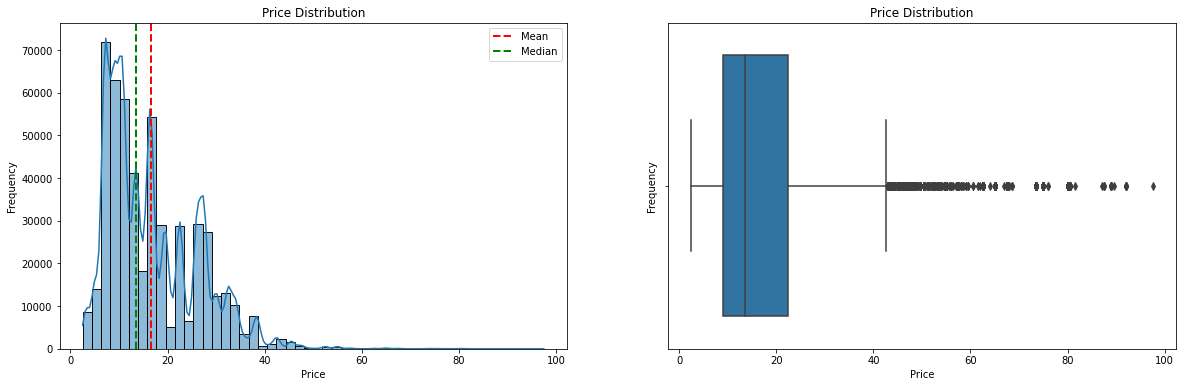

In [40]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='price', data=df_train, bins=50, kde=True)
plt.axvline(df_train.price.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_train.price.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='price', data=df_train)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Karena distribusi dari kolom `price` ini skewed, maka akan dilakukan outlier handling menggunakan **IQR**.

In [41]:
IQR = df_train.price.quantile(0.75) - df_train.price.quantile(0.25)
lower_bound = df_train.price.quantile(0.25) - (IQR * 1.5)
upper_bound = df_train.price.quantile(0.75) + (IQR * 1.5)

In [42]:
print(f'Number of outliers: {len(df_train[(df_train.price < lower_bound) | (df_train.price > upper_bound)])}')

Number of outliers: 4444


Setelah dilakukan perhitungan batas bawah dan batas atas, ditemukan ada **4444 outlier** pada `df_train`.

Menghilangkan outlier dari `df_train`.

In [43]:
df_train = df_train[(df_train.price > lower_bound) & (df_train.price < upper_bound)]

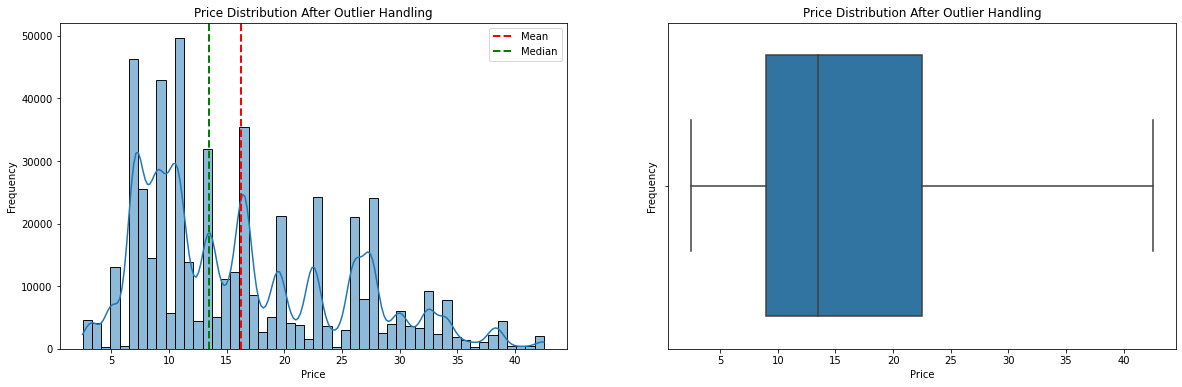

In [44]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='price', data=df_train, bins=50, kde=True)
plt.axvline(df_train.price.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_train.price.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Price Distribution After Outlier Handling')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='price', data=df_train)
plt.title('Price Distribution After Outlier Handling')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [45]:
df_train.shape

(505939, 57)

Setelah dilakukan penghapusan outlier jumlah baris dari dataframe `df_train` menjadi **505939 baris**.

### Feature Selection

Pada bagian ini akan dilakukan pemilihan feature (kolom) apa saja yang akan digunakan.

Berdasarakan EDA, akan diasumsikan bahwa kolom `price` hanya memliki hubungan dengan kolom `name`, `distance`, dan `surge_multiplier`. Maka kolom-kolom tersebut yang akan dijadikan feature dengan `price` sebagai targetnya.

In [46]:
X_train = df_train[['name', 'distance', 'surge_multiplier']] # Features
y_train = df_train.price # Target

X_test = df_test[['name', 'distance', 'surge_multiplier']] # Features
y_test = df_test.price # Target

Selanjutnya akan memisahkan kolom yang bertipe numeric dengan categorical pada `X_train` dan `X_test` untuk memudahkan proses **Scaling** dan **Encoding**.

In [47]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')
print(f'Number of categorical columns: {len(cat_cols)}')
print(f'Categorical columns: {cat_cols}')

X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

Number of numerical columns: 2
Numerical columns: Index(['distance', 'surge_multiplier'], dtype='object')
Number of categorical columns: 1
Categorical columns: Index(['name'], dtype='object')


### Features Scaling

Karena rentang dari kolom `distance` dan `surge_multiplier` berbeda, maka akan dilakukan normalisasi (**Scaling**) pada kedua kolom tersebut menggunakan **StandardScaler**.

In [48]:
scaler = StandardScaler()

In [49]:
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

Mengubah `X_train_num_scaled` dan `X_test_num_scaled` menjadi **dataframe**.

In [50]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_cols)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_cols)

`X_train_num_scaled` setelah dilakukan normalisasi (**Scaling**).

In [51]:
X_train_num_scaled.head()

,distance,surge_multiplier
0,-1.030839,-0.146859
1,2.604063,-0.146859
2,-1.012933,-0.146859
3,-0.019155,-0.146859
4,0.616505,-0.146859


`X_test_num_scaled` setelah dilakukan normalisasi (**Scaling**).

In [52]:
X_test_num_scaled.head()

,distance,surge_multiplier
0,0.276293,-0.146859
1,-1.299428,-0.146859
2,0.804518,-0.146859
3,-0.001249,-0.146859
4,-0.905498,-0.146859


### Features Encoding

Pada bagian ini akan dilakukan **encoding** atau merubah variable kategori menjadi angka, karena kolom `name` adalah **kategori nominal** (tidak memiliki urutan) maka akan dilakukan encoding menggunakan **OneHotEncoder**.

In [53]:
encoder = OneHotEncoder()

In [54]:
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

Mengubah `X_train_cat_encoded` dan `X_test_cat_encoded` menjadi **dataframe**.

In [55]:
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_cols))

`X_train_cat_encoded` setelah dilakukan **encoding**.

In [56]:
X_train_cat_encoded.head()

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`X_test_cat_encoded` setelah dilakukan **encoding**.

In [57]:
X_test_cat_encoded.head()

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Concate Features

Setelah feature numerik dan kategori dipisah untuk dilakukan **Scaling** dan **Encoding**, pada bagian ini akan menggabungkan kembali feature menjadi `X_train` dan `X_test`.

In [58]:
X_train = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

Bentuk `X_train` setelah melalui **feature scaling** dan **feature encoding**.

In [59]:
X_train.head()

,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,-1.030839,-0.146859,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.604063,-0.146859,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.012933,-0.146859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.019155,-0.146859,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.616505,-0.146859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Bentuk `X_test` setelah melalui **feature scaling** dan **feature encoding**.

In [60]:
X_test.head()

,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.276293,-0.146859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.299428,-0.146859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.804518,-0.146859,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.001249,-0.146859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.905498,-0.146859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Model Definition

Akan dibuat **3 model**, dimana:
- `model` adalah model **Linear Regression** biasa.
- `model_poly2` adalah model **Linear Regression** dengan **Polynomial Features 2-Degree**.
- `model_poly3` adalah model **Linear Regression** dengan **Polynomial Features 3-Degree**.

In [81]:
model = LinearRegression()
model_poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_poly3 = make_pipeline(PolynomialFeatures(3), LinearRegression())

## Model Training

In [86]:
model.fit(X_train, y_train)

LinearRegression()

In [82]:
model_poly2.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [84]:
model_poly3.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

## Model Evaluation

In [87]:
print('----Training----')
print(f'Training Score: {model.score(X_train, y_train):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, model.predict(X_train))}')
print('----Validation----')
print(f'Validation Score: {model.score(X_test, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, model.predict(X_test))}')

----Training----
Training Score: 0.93
Training Mean Absolute Error (MAE): 1.6769109567038787
----Validation----
Validation Score: 0.92
Validation Mean Absolute Error (MAE): 1.7665305132071432


In [88]:
print('----Training----')
print(f'Training Score: {model_poly2.score(X_train, y_train):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, model_poly2.predict(X_train))}')
print('----Validation----')
print(f'Validation Score: {model_poly2.score(X_test, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, model_poly2.predict(X_test))}')

----Training----
Training Score: 0.96
Training Mean Absolute Error (MAE): 1.2646860577366725
----Validation----
Validation Score: 0.96
Validation Mean Absolute Error (MAE): 1.3088186647253957


In [89]:
print('----Training----')
print(f'Training Score: {model_poly3.score(X_train, y_train):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, model_poly3.predict(X_train))}')
print('----Validation----')
print(f'Validation Score: {model_poly3.score(X_test, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, model_poly3.predict(X_test))}')

----Training----
Training Score: 0.96
Training Mean Absolute Error (MAE): 1.2296354194591457
----Validation----
Validation Score: 0.96
Validation Mean Absolute Error (MAE): 1.2832420186218394


## Model Testing (Inference Data)

In [64]:
inference = inference.reset_index(drop=True)

In [65]:
inference_num = inference[num_cols]
inference_cat = inference[cat_cols]

### Inference Scaling

In [66]:
inference_num_scaled = scaler.transform(inference_num)

### Inference Encoding

In [67]:
inference_cat_encoded = encoder.transform(inference_cat)

### Inference Concat

In [68]:
inference_final = np.concatenate([inference_num_scaled, inference_cat_encoded.toarray()], axis=1)

### Infernce Prediction

In [90]:
y_pred_inf = model.predict(inference_final)
y_pred_inf_poly2 = model_poly2.predict(inference_final)
y_pred_inf_poly3 = model_poly3.predict(inference_final)

In [92]:
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['price prediction LG'])
y_pred_inf

,price prediction
0,11.117104
1,14.095690
2,8.590248
3,28.425169
4,11.024267
5,34.079126
6,17.494581
7,23.087332
8,6.879089
9,33.050644


In [93]:
y_pred_inf_poly2 = pd.DataFrame(y_pred_inf_poly2, columns=['price prediction Poly 2'])
y_pred_inf_poly2

,price prediction Poly 2
0,8.401581
1,13.917725
2,9.089310
3,28.106171
4,9.749786
5,35.492859
6,12.691193
7,23.441559
8,8.119781
9,33.748627


In [94]:
y_pred_inf_poly3 = pd.DataFrame(y_pred_inf_poly3, columns=['price prediction Poly 3'])
y_pred_inf_poly3

,price prediction Poly 3
0,8.386946
1,13.796480
2,8.904090
3,27.786915
4,9.899308
5,35.615838
6,12.822594
7,23.166249
8,8.059999
9,33.737837


In [95]:
pd.concat([inference.reset_index(drop=True)[['name', 'distance', 'surge_multiplier', 'price']], y_pred_inf, y_pred_inf_poly2, y_pred_inf_poly3], axis=1)

,name,distance,surge_multiplier,price,price prediction,price prediction Poly 2,price prediction Poly 3
0,Shared,4.09,1.0,9.0,11.117104,8.401581,8.386946
1,UberXL,1.61,1.0,14.0,14.095690,13.917725,13.796480
2,UberX,1.75,1.0,10.0,8.590248,9.089310,8.904090
3,Black SUV,1.57,1.0,27.5,28.425169,28.106171,27.786915
4,UberPool,3.04,1.0,7.5,11.024267,9.749786,9.899308
5,Lux Black XL,3.32,1.0,34.0,34.079126,35.492859,35.615838
6,UberPool,5.46,1.0,11.0,17.494581,12.691193,12.822594
7,Lux Black,2.45,1.0,22.5,23.087332,23.441559,23.166249
8,UberX,1.11,1.0,7.5,6.879089,8.119781,8.059999
9,Black SUV,3.30,1.0,37.0,33.050644,33.748627,33.737837


In [72]:
print(f"Inference Mean Absolute Error (MAE): {mean_absolute_error(inference['price'], y_pred_inf)}")
print(f"Inference Score: {model.score(inference_final, inference['price'])}")

Inference Mean Absolute Error (MAE): 1.9803287506103515
Inference Score: 0.9324103370166688


In [97]:
print(f"Inference Mean Absolute Error (MAE): {mean_absolute_error(inference['price'], y_pred_inf_poly2)}")
print(f"Inference Score: {model_poly2.score(inference_final, inference['price'])}")

Inference Mean Absolute Error (MAE): 1.2444107055664062
Inference Score: 0.9796597031200472


In [98]:
print(f"Inference Mean Absolute Error (MAE): {mean_absolute_error(inference['price'], y_pred_inf_poly3)}")
print(f"Inference Score: {model_poly3.score(inference_final, inference['price'])}")

Inference Mean Absolute Error (MAE): 1.2525550842285156
Inference Score: 0.9785930474230434
